In [1]:
# Import necessary libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx


# Data importation

In [15]:
# Load data from a JSON file

# Define the file path. Replace with the actual path to the file if different.
file_path = 'data/match_1.json'
# Load the JSON file into a pandas DataFrame with records orientation.
data = pd.read_json(file_path, orient='records')

# Display the first 5 rows of the data for a quick overview
print(data.head(-5))


    label                                               norm
0    walk  [23.177037336396975, 23.361525285249378, 21.53...
1    walk  [20.998214383911275, 19.182798059840767, 18.27...
2    walk  [21.95259682019565, 20.62720484424047, 22.5554...
3    walk  [19.39209748358647, 19.30460665293087, 18.9787...
4    rest  [22.069263037713093, 19.672270483203395, 19.88...
..    ...                                                ...
564  walk  [20.61181985831613, 24.197537338512344, 22.862...
565  walk  [21.972656197236496, 24.14863375700235, 21.688...
566  walk  [19.43520614806284, 18.88816545209564, 20.0625...
567  walk  [21.245737438782683, 19.513316321541005, 19.63...
568  walk  [20.387770267237794, 20.264311083557505, 21.39...

[569 rows x 2 columns]


In [3]:
# Display a summary of the dataset

# Get a concise summary of the DataFrame, including the number of non-null values in each column, data types, and memory usage.
data.info()
# Get descriptive statistics of the DataFrame columns.
data.describe()

# The output indicates:
# - The DataFrame has 574 entries (rows) ranging from index 0 to 573.
# - It has 2 columns: 'label' and 'norm', both of which are of object (string) data type.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   574 non-null    object
 1   norm    574 non-null    object
dtypes: object(2)
memory usage: 9.1+ KB


,label,norm
count,574,574
unique,8,574
top,walk,"[23.177037336396975, 23.361525285249378, 21.53..."
freq,245,1


# Feature creation, time measure

count    574.000000
mean       0.970279
std        0.477668
min        0.020000
25%        0.680000
50%        0.920000
75%        1.160000
max        4.540000
Name: sec_time, dtype: float64


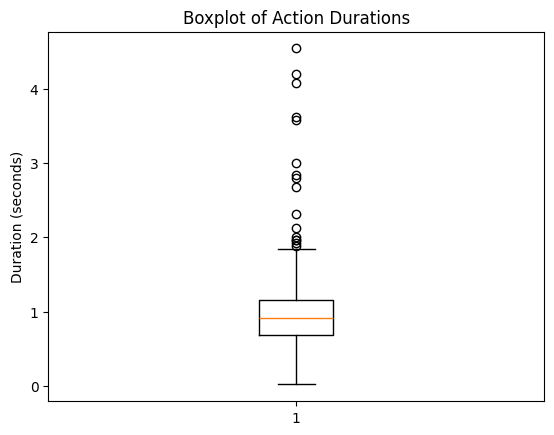

In [4]:
# Compute size of each list in 'norm' column
data['norm_length'] = data['norm'].apply(len)

# Convert size to time in seconds (assuming 50 Hz sampling rate)
data['sec_time']= data['norm_length']/50

# Calculate cumulative time in seconds
data['sec_time_cum'] = data['sec_time'].cumsum()

# Convert cumulative time to minutes
data['time_min']= data['sec_time_cum']/60

# Uncommented lines determine how many actions have a duration below 0.1 seconds or above 3 seconds:
# less_than_0_1 = (data['sec_time'] < 0.1).sum()
# greater_than_3 = (data['sec_time'] > 3).sum()

# print(f"Number of values less than 0.1: {less_than_0_1}")
# print(f"Number of values greater than 3: {greater_than_3}")

# Display statistics about the duration of actions in seconds
print(data['sec_time'].describe())

# Plot boxplot of action durations in seconds
plt.boxplot(data['sec_time'])
plt.ylabel('Duration (seconds)')
plt.title('Boxplot of Action Durations')
plt.show()


# The median action duration is 0.92 seconds.
# 25% of the actions have a duration less than 0.68 seconds (1st quartile).
# 75% of the actions take less than 1.16 seconds (3rd quartile).
# There are several outliers, with the max duration reaching up to 4.54 seconds.


# Label analysis

label
walk       245
run        209
dribble     42
rest        25
pass        24
tackle      20
shot         6
cross        3
Name: count, dtype: int64


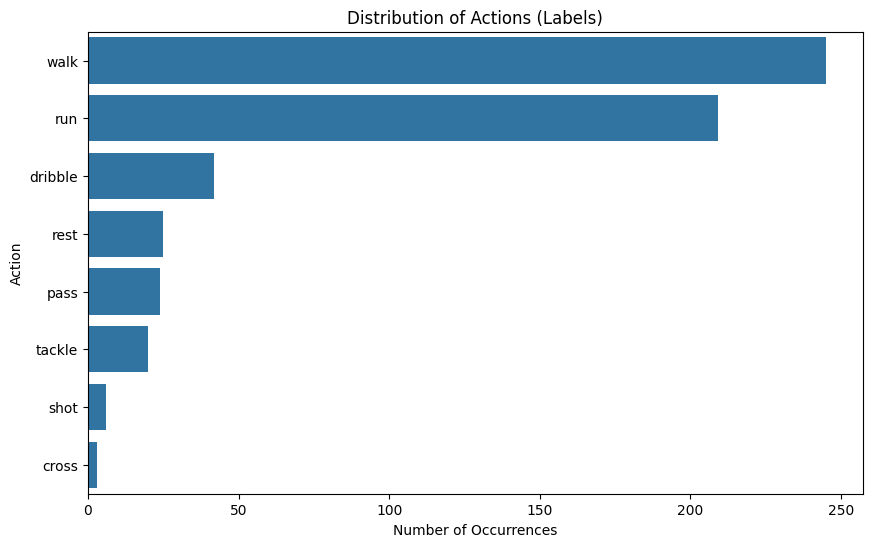

In [5]:
# Observe class imbalances
print(data['label'].value_counts())

# Plot distribution of action labels
plt.figure(figsize=(10,6))
sns.countplot(data=data, y='label', order=data['label'].value_counts().index)
plt.title('Distribution of Actions (Labels)')
plt.xlabel('Number of Occurrences')
plt.ylabel('Action')
plt.show()

# The 'walk' action is the most frequent with 245 occurrences.
# The 'run' action follows closely with 209 occurrences.
# Actions like 'shot' and 'cross' are rare with only 6 and 3 occurrences respectively.
# This indicates a clear imbalance in the action distribution.
# Most of the time, player play without ball

# Statistical Analysis of norms by gait

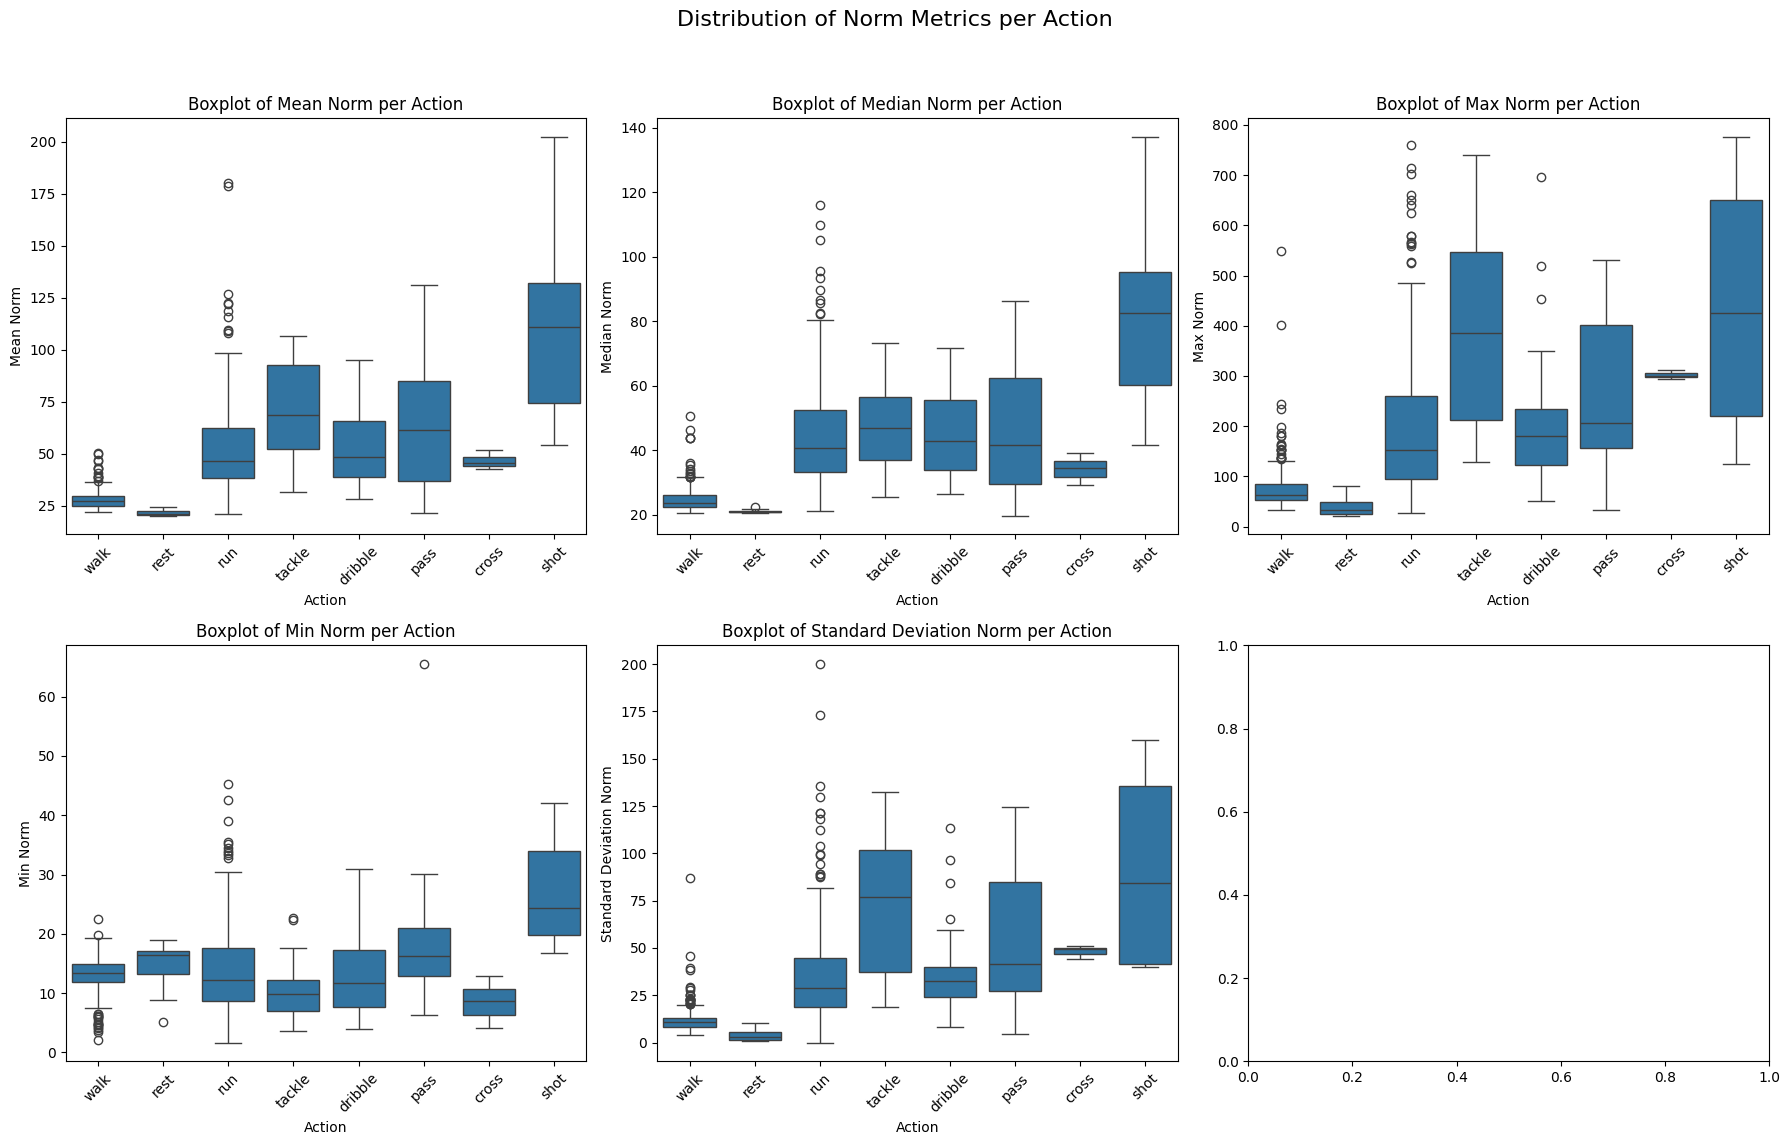

In [6]:
# Extract basic metrics for each norm sequence
data['mean_norm'] = data['norm'].apply(np.mean)
data['median_norm'] = data['norm'].apply(np.median)
data['max_norm'] = data['norm'].apply(max)
data['min_norm'] = data['norm'].apply(min)
data['std_norm'] = data['norm'].apply(np.std)

# Set up a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution of Norm Metrics per Action', fontsize=16)
axes = axes.flatten()  # Flattening the 2D axes array to easily iterate over it

# List of metrics and corresponding names for plotting
metrics = ['mean_norm', 'median_norm', 'max_norm', 'min_norm', 'std_norm']
titles = ['Mean', 'Median', 'Max', 'Min', 'Standard Deviation']

# Loop through metrics and titles to create a boxplot in each subplot
for i, (metric, title) in enumerate(zip(metrics, titles)):
    sns.boxplot(x='label', y=metric, data=data, ax=axes[i])
    axes[i].set_title(f'Boxplot of {title} Norm per Action')
    axes[i].set_xlabel('Action')
    axes[i].set_ylabel(f'{title} Norm')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Observations:
# 1. The mean norm for 'shot' is significantly higher than other actions.
# 2. Both 'shot' and 'dribble' have a wide range of norms, as indicated by their interquartile range (IQR).
# 3. 'Walk' and 'rest' have lower median norms compared to actions like 'run' or 'shot'.
# 4. There's a high standard deviation in norms for 'shot', suggesting varying intensity or style.
# 5. Outliers are present in several actions, which might be anomalies or extreme cases.

In [7]:
# Extract basic metrics for each norm sequence
data['mean_norm'] = data['norm'].apply(np.mean)
data['median_norm'] = data['norm'].apply(np.median)
data['min_norm'] = data['norm'].apply(min)
data['max_norm'] = data['norm'].apply(max)
data['std_norm'] = data['norm'].apply(np.std)

# Group by label and compute descriptive statistics for each group
grouped_stats = data.groupby('label').agg({
    'mean_norm': ['mean', 'std', 'min', 'median', 'max'],
    'median_norm': ['mean', 'std', 'min', 'median', 'max'],
    'std_norm': ['mean'],
    'min_norm': ['mean'],
    'max_norm': ['mean']
}).reset_index()

# Display the resulting DataFrame
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
print(grouped_stats.round(3).T)


# The table presents a comprehensive view of the norm metrics across various actions.
# From the mean values of the mean_norm metric, the 'shot' action has the highest average norm value (113.279), 
# while the 'rest' action has the lowest (21.834). This suggests that the 'shot' action tends to have more intense movements.
# Similarly, observing the mean values of the max_norm metric, 'shot' peaks at 438.247, further emphasizing its intensity.
# The 'rest' action, as expected, shows the least variability with a std_norm mean of just 3.783.
# The 'walk' and 'rest' actions have the lowest mean values for min_norm, indicating they start from a relatively low baseline.
# Overall, the table showcases the variance and central tendencies of norm metrics for each action, helping in understanding the nature of these actions.



                          0        1        2       3        4        5  \
label                 cross  dribble     pass    rest      run     shot   
mean_norm   mean     46.708   52.883   64.133  21.834   54.405  113.279   
            std       4.804    16.46   29.626    1.27   24.501    53.64   
            min      42.665   28.116   21.791  20.379   21.346   54.048   
            median   45.441   48.393   61.556  21.238   46.677  111.169   
            max      52.019   95.327  130.965  24.684  179.925   202.13   
median_norm mean     34.281   45.191   46.327  21.028   44.736   82.678   
            std       4.898   13.188   20.611   0.418   16.815   33.971   
            min      29.276   26.466   19.813  20.509   21.218   41.647   
            median   34.502   42.921   41.628  20.964    40.62   82.513   
            max      39.065   71.803   86.339  22.353  116.014  137.006   
std_norm    mean     48.142   36.163   51.042   3.783   37.846   91.347   
min_norm    mean      8.5

# Statistical Analysis of last by gait

In [8]:
# Compute basic statistics for the specified column per action type
columns_to_describe = ['sec_time']
for column in columns_to_describe:
    print(f"Statistics for {column} grouped by Action:")
    print(data.groupby('label')[column].describe().round(3))
    print("\n")  # Adding a newline for better separation between results

# Observations based on the sec_time column grouped by Action:
# 1. 'rest' has the highest average sec_time (mean = 1.790), indicating the longest duration among the actions.
# 2. 'shot' has the shortest average sec_time (mean = 0.557), suggesting it is a quick action.
# 3. 'rest' also has the widest spread of sec_time values (std = 1.180), indicating a high variability in rest durations.
# 4. The max sec_time for 'rest' is 4.54, which is the longest single duration across all actions.
# 5. In contrast, 'run' has the shortest minimum sec_time (min = 0.02), implying some very brief running moments.
# 6. 'walk' has the highest number of records (count = 245), making it the most frequent action in the dataset.
# Overall, this summary provides insights into the duration of each action, helping to understand their respective intensities and frequencies.



Statistics for sec_time grouped by Action:
         count   mean    std   min   25%   50%    75%   max
label                                                      
cross      3.0  1.200  0.317  0.84  1.08  1.32  1.380  1.44
dribble   42.0  0.832  0.337  0.16  0.64  0.74  1.030  2.00
pass      24.0  0.802  0.479  0.06  0.46  0.69  1.065  1.96
rest      25.0  1.790  1.180  0.44  0.80  1.46  1.960  4.54
run      209.0  0.767  0.295  0.02  0.56  0.72  0.880  1.88
shot       6.0  0.557  0.348  0.08  0.39  0.48  0.825  1.00
tackle    20.0  0.884  0.358  0.52  0.59  0.80  1.080  1.84
walk     245.0  1.115  0.365  0.40  0.96  1.08  1.240  3.58




Basic statistics on the length of norm sequences grouped by Action:
         count       mean        std   min   25%   50%    75%    max
label                                                               
cross      3.0  60.000000  15.874508  42.0  54.0  66.0  69.00   72.0
dribble   42.0  41.595238  16.850938   8.0  32.0  37.0  51.50  100.0
pass      24.0  40.125000  23.947974   3.0  23.0  34.5  53.25   98.0
rest      25.0  89.520000  58.981014  22.0  40.0  73.0  98.00  227.0
run      209.0  38.330144  14.772346   1.0  28.0  36.0  44.00   94.0
shot       6.0  27.833333  17.405938   4.0  19.5  24.0  41.25   50.0
tackle    20.0  44.200000  17.922641  26.0  29.5  40.0  54.00   92.0
walk     245.0  55.742857  18.272168  20.0  48.0  54.0  62.00  179.0




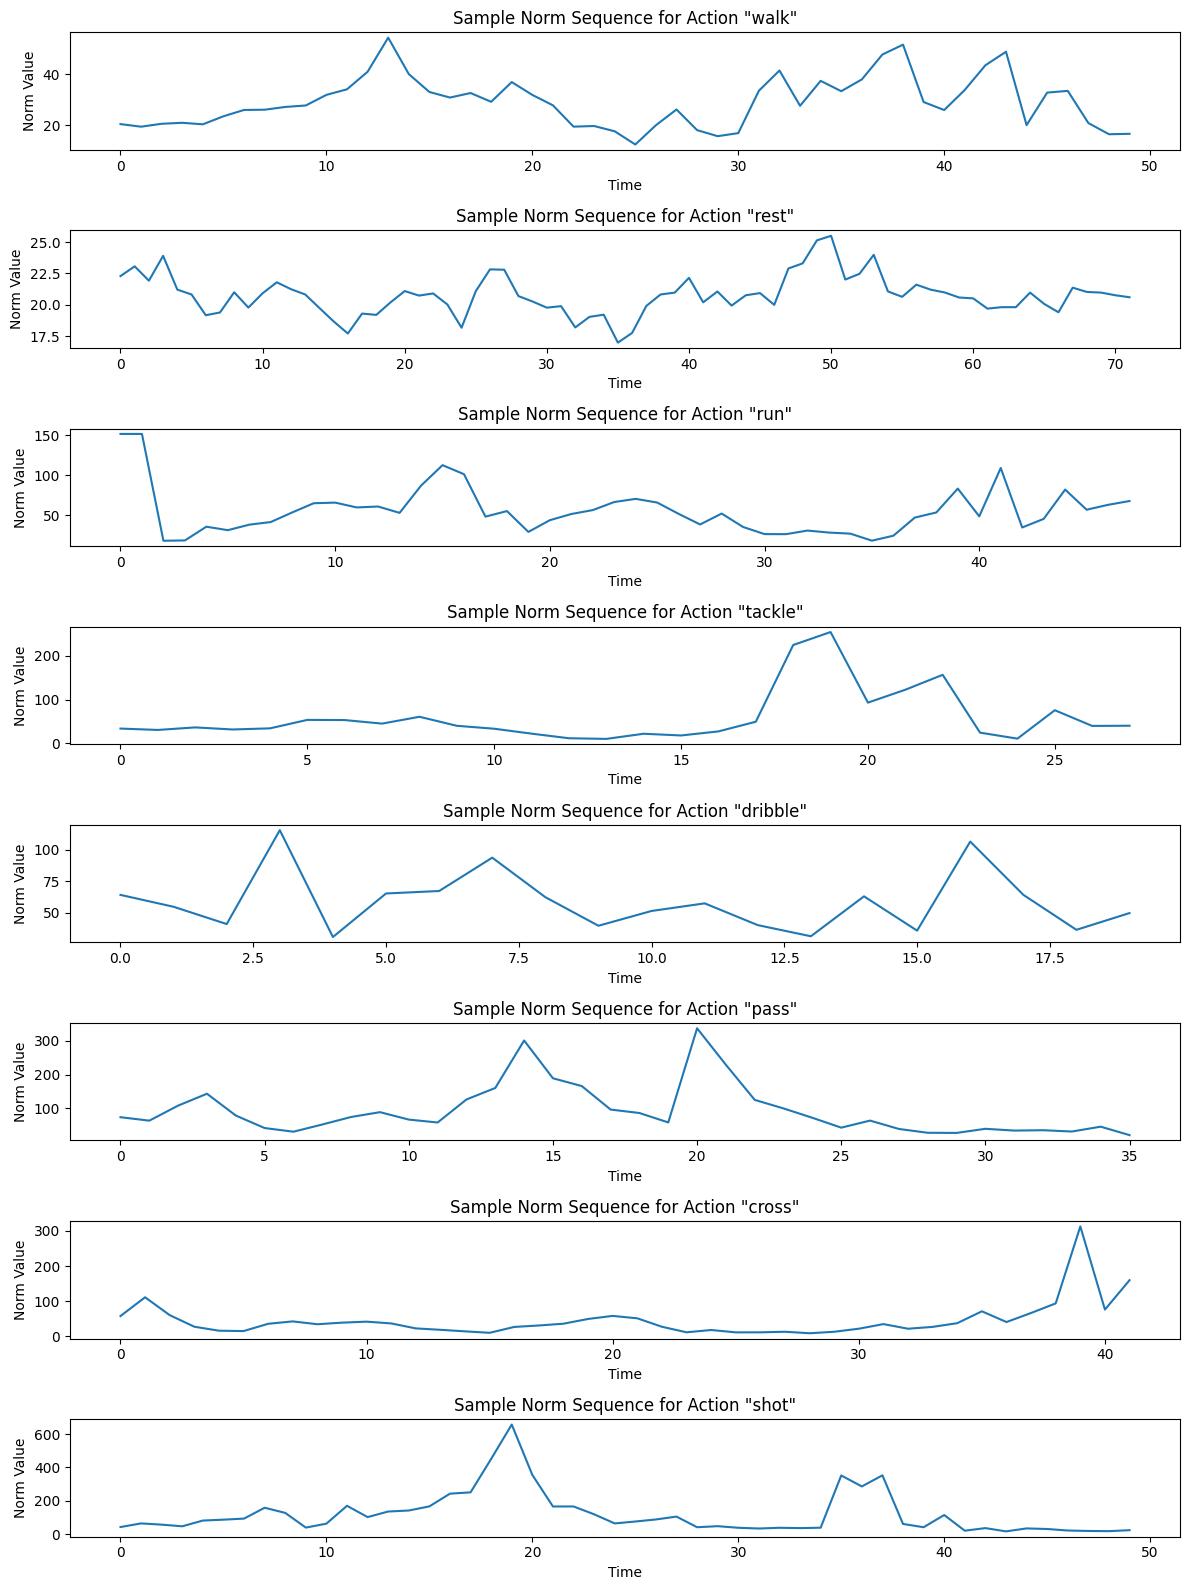

In [9]:
# Extract the length of each norm sequence
data['norm_length'] = data['norm'].apply(len)

# Compute basic statistics on the length of sequences for each action type
len_stats = data.groupby('label')['norm_length'].describe()
print("Basic statistics on the length of norm sequences grouped by Action:")
print(len_stats)
print("\n")  # Adding a newline for better separation between results

# Visualization of a sample norm sequence for each action type
actions = data['label'].unique()
fig, axs = plt.subplots(len(actions), figsize=(12, 2*len(actions)))

for ax, action in zip(axs, actions):
    # Select a random sequence for the current action type
    example_sequence = data[data['label'] == action]['norm'].sample(1).values[0]
    
    ax.plot(example_sequence)
    ax.set_title(f'Sample Norm Sequence for Action "{action}"')
    ax.set_xlabel('Time')
    ax.set_ylabel('Norm Value')

plt.tight_layout()
plt.show()




# Visualization of Mean Norm Across Indices with Action-specific Coloring

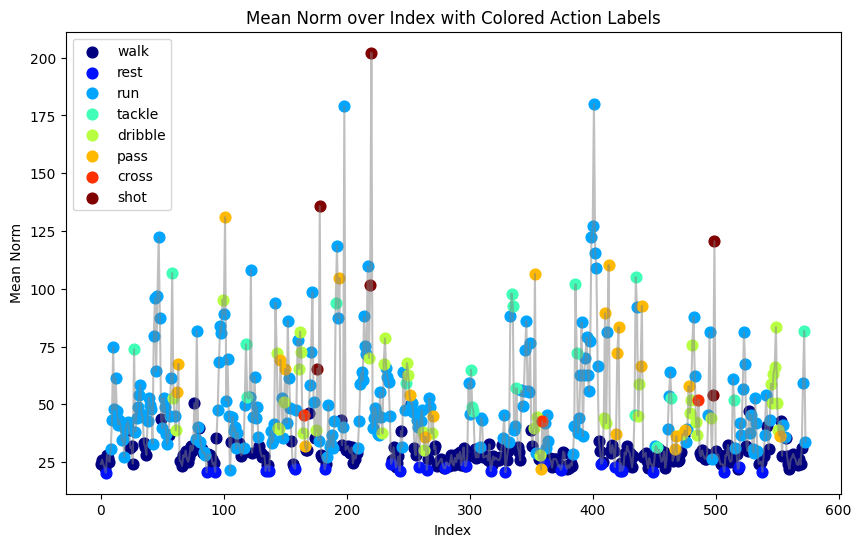

In [10]:
# Create a color dictionary for each unique label
labels = data['label'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(labels)))
color_map = dict(zip(labels, colors))

# Set up the plot
fig, ax = plt.subplots(figsize=(10,6))

# Plot the line
ax.plot(data.index, data['mean_norm'], color='grey', alpha=0.5, linestyle='-', linewidth=1.5)

# Plot colored markers for each label
for label in labels:
    subset = data[data['label'] == label]
    ax.scatter(subset.index, subset['mean_norm'], label=label, color=color_map[label], s=60)

ax.set_xlabel('Index')
ax.set_ylabel('Mean Norm')
ax.set_title('Mean Norm over Index with Colored Action Labels')
ax.legend(loc='upper left')
plt.show()

# Observation:
# Peaks in the mean norm often correspond to high-intensity actions such as shots, pass, cross, tackles.
# walk, rest, run seems more regular less intense actions. 
# The distinguishing factor could likely be the length of the norm sequence.


# Stance length analysis

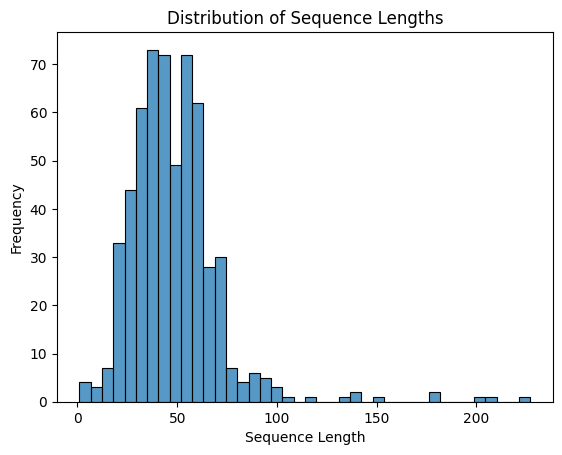

In [11]:
# Calculate the length of each norm sequence
data['norm_length'] = data['norm'].apply(len)

# Plot the distribution of the sequence lengths
sns.histplot(data['norm_length'])
plt.title("Distribution of Sequence Lengths")
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.show()


#the distribution of sequence lengths seems to follow a normal distribution
#The majority of sequence lengths fall within the 50 to 100 range, with the peak (mode) slightly below 100


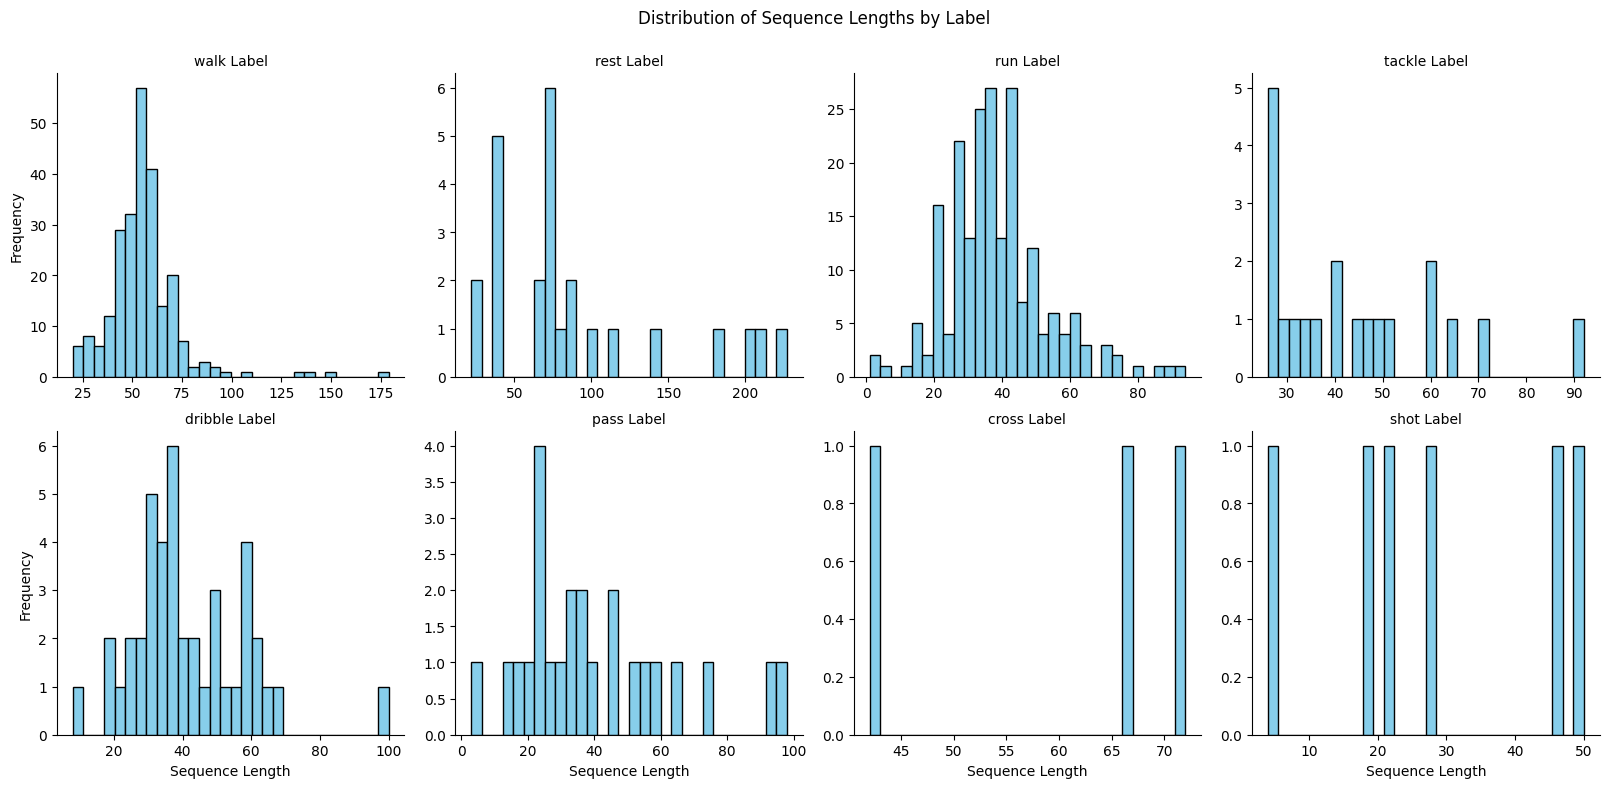

In [12]:
# Use FacetGrid to create a histogram for each label
g = sns.FacetGrid(data, col="label", col_wrap=4, sharey=False, sharex=False, height=4)
g.map(plt.hist, "norm_length", bins=30, color='skyblue', edgecolor="black")

g.set_titles(col_template="{col_name} Label")
g.set_axis_labels("Sequence Length", "Frequency")

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of Sequence Lengths by Label")

plt.show()


# Markov Chain Analysis for Action Transitions

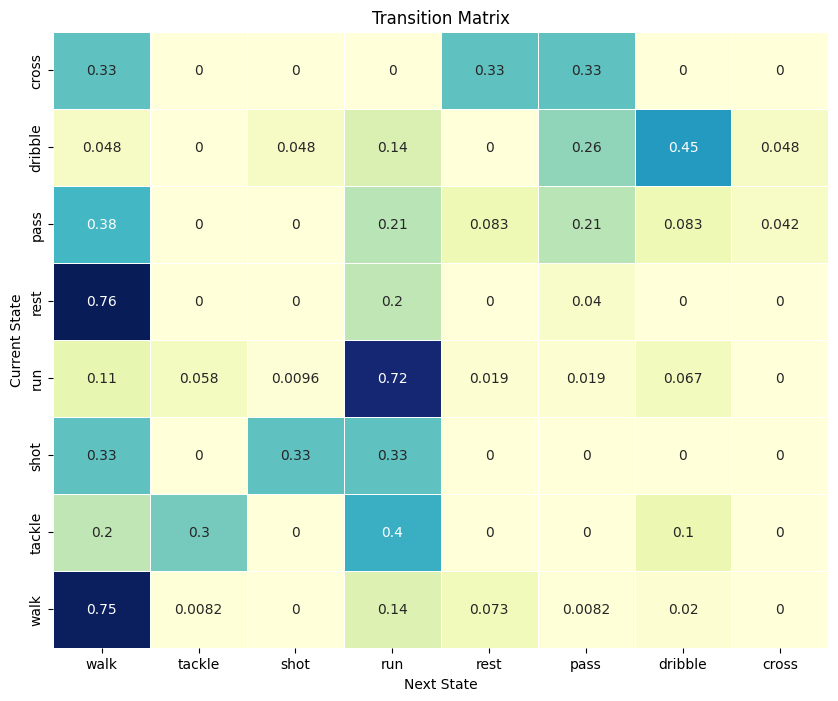

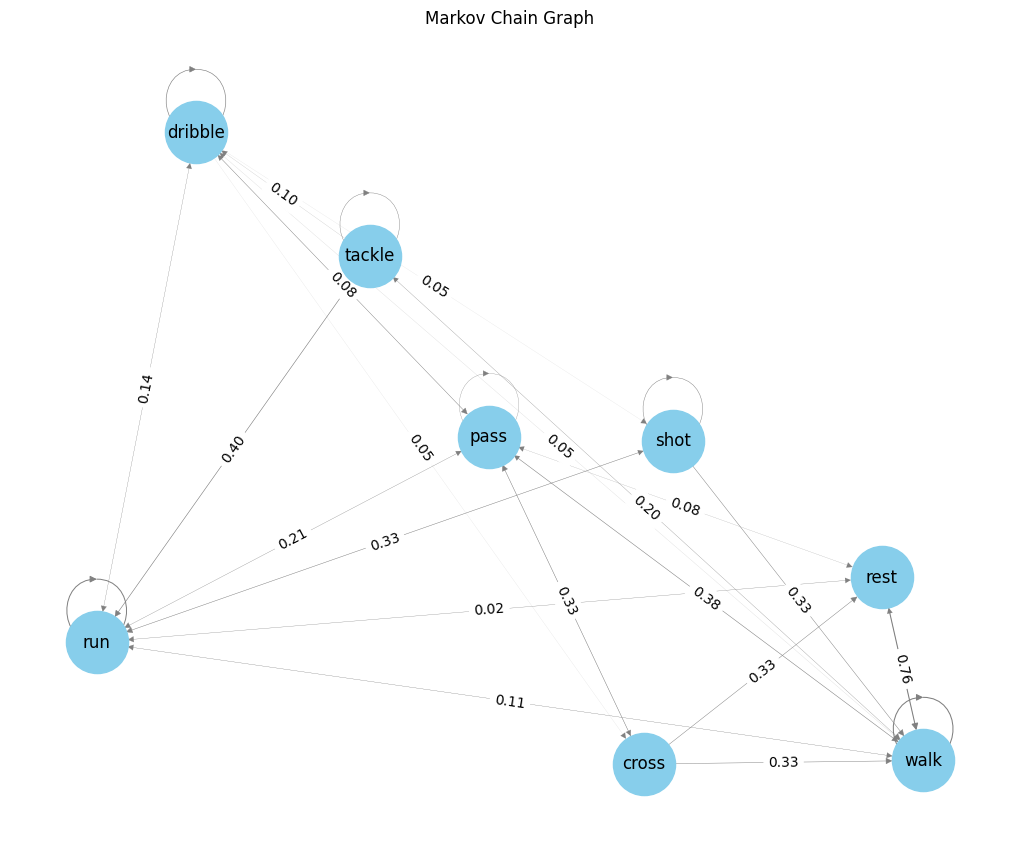

In [13]:
def compute_transition_frequencies(data):
    """
    Compute the frequency of transitions between different actions in the data.
    
    Args:
    - data (DataFrame): The dataset containing labeled sequences of actions.

    Returns:
    - matrix (dict): A dictionary representing the frequency of transitions 
                     between different actions.
    """
    matrix = {}  # Initialize an empty dictionary to hold transition frequencies.
    
    # Loop through each row of the data except the last one
    for i in range(len(data)-1):
        # Get the current action from the 'label' column
        current_action = data.iloc[i]['label']
        # Get the next action from the 'label' column
        next_action = data.iloc[i+1]['label']
        
        # Check if the current action is already in the matrix
        if current_action not in matrix:
            matrix[current_action] = {}  # If not, initialize it with an empty dictionary.
        
        # Check if the next action is already a key under the current action
        if next_action not in matrix[current_action]:
            matrix[current_action][next_action] = 1  # If not, initialize it with a count of 1.
        else:
            matrix[current_action][next_action] += 1  # If yes, increment the count.
    
    # Loop to normalize the transition counts to get transition probabilities
    for current_action, transitions in matrix.items():
        # Calculate the total count of transitions from the current action
        total = sum(transitions.values())
        # Normalize each count by the total
        for next_action, count in transitions.items():
            matrix[current_action][next_action] = count / total
    
    return matrix

def transition_frequencies_to_dataframe(transitions):
    """
    Convert the transition frequencies dictionary to a DataFrame.
    
    Args:
    - transitions (dict): A dictionary representing the frequency of transitions 
                          between different actions.

    Returns:
    - matrix (DataFrame): A dataframe representing the transition probabilities.
    """
    # Convert the dictionary of transition frequencies to a DataFrame
    matrix = pd.DataFrame().from_dict(transitions, orient='index').fillna(0)
    
    # Determine all unique actions present in either the rows or columns of the matrix
    all_actions = sorted(set(matrix.index) | set(matrix.columns))
    
    # Reindex the matrix to ensure all actions are represented in both rows and columns
    # Fill in any missing transitions with 0
    matrix = matrix.reindex(index=all_actions, columns=reversed(all_actions)).fillna(0)
    
    return matrix




def plot_transition_matrix(matrix):
    """
    Display the transition matrix as a heatmap.
    
    Args:
    - matrix (DataFrame): Transition matrix to be displayed.
    """
    # Set up the figure size for better visualization
    plt.figure(figsize=(10, 8))
    
    # Using seaborn's heatmap function to visualize the matrix
    sns.heatmap(matrix, annot=True, cmap='YlGnBu', cbar=False, linewidths=.5)
    
    # Setting the title and axis labels
    plt.title('Transition Matrix')
    plt.xlabel('Next State')
    plt.ylabel('Current State')
    
    # Display the plot
    plt.show()

def plot_markov_chain(transitions):
    """
    Display the Markov chain as a directed graph.
    
    Args:
    - transitions (dict): Dictionary of transition probabilities between states.
    """
    # Create a directed graph
    G = nx.DiGraph()
    
    # Add edges to the graph based on the transition probabilities
    for action, next_actions in transitions.items():
        for next_action, prob in next_actions.items():
            G.add_edge(action, next_action, weight=prob)
    
    # Get positions for the nodes using spring layout
    pos = nx.spring_layout(G)
    
    # Create edge labels with transition probabilities
    edge_labels = {(u, v): "{:.2f}".format(d["weight"]) for u, v, d in G.edges(data=True)}
    
    # Set up the figure size for better visualization
    plt.figure(figsize=(10, 8))
    
    # Draw the graph with nodes, edges, and labels
    nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=2000, 
            width=[d["weight"] for _, _, d in G.edges(data=True)], edge_color="gray")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    # Setting the title
    plt.title("Markov Chain Graph")
    
    # Display the plot
    plt.show()

# Use the build_transition_matrix function to get transition probabilities
transitions = compute_transition_frequencies(data)

# Convert the transition probabilities to a DataFrame for visualization
matrix = transition_frequencies_to_dataframe(transitions)

# Display the transition matrix as a heatmap
plot_transition_matrix(matrix)

# Display the Markov chain as a directed graph
plot_markov_chain(transitions)



#a lot of self transition probabilities, walk, run for example
# Diverse transitions: dribble leads to a lot of different transition
# zero transition: Several transitions have zero probabilities, implying no transition between certain states. cross to tackle for example
# Interesting patterns:
 # after a shot, there is equal probability to walk, shot or run
 




# Summary of Our Observations

## Action Duration:
- Median duration is 0.92 seconds.
- 1st quartile: 0.68 seconds; 3rd quartile: 1.16 seconds.
- Presence of outliers, with the longest duration being 4.54 seconds.

## Action Frequency:
- 'Walk' is the most frequent (245 occurrences); followed by 'run' (209 occurrences).
- Rare actions: 'shot' (6 occurrences) and 'cross' (3 occurrences).
- Predominant play style: without ball.

## Norms of Actions:
- 'Shot' has the highest mean norm.
- Wide norm range for 'shot' and 'dribble'.
- 'Walk' and 'rest' showcase lower median norms.
- High norm variability in 'shot'.
- Several actions exhibit outliers.

## Action Duration by sec_time Column:
- 'Rest' lasts the longest on average (mean = 1.790).
- 'Shot' is the quickest (mean = 0.557).
- High variability in 'rest' durations (std = 1.180).
- Longest duration: 'rest' (4.54 seconds); shortest burst of action: 'run' (0.02 seconds).
- Most frequent action: 'walk' (245 occurrences).

## Action Intensity:
- High-intensity actions: shots, passes, crosses, tackles.
- Low-intensity actions: walk, rest, run.
- Differentiating factor: norm sequence length.

## Sequence Lengths:
- Normal distribution pattern.
- Majority range: 50 to 100, peaking slightly below 100.

## Transition Matrix Insights:
- Several actions with high self-transition likelihood.
- Diverse transitions observed for 'dribble'.
- Zero transition probability between some actions, e.g., 'cross' to 'tackle'.
- Post 'shot', equal chances to 'walk', 'shot', or 'run'.
